In [1]:
pip install tensorflow numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
print(tf.__version__)     

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau

2.18.0


In [5]:
from tensorflow.keras.datasets import cifar10

# Loading the CIFAR-10 dataset.
# The dataset is splitting into training and testing sets.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [7]:
# Normalizing the pixel values of the images to the range [0, 1].
# This will help with training the model by ensuring numerical stability.
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

In [9]:
# Here I am defining the class names.
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']


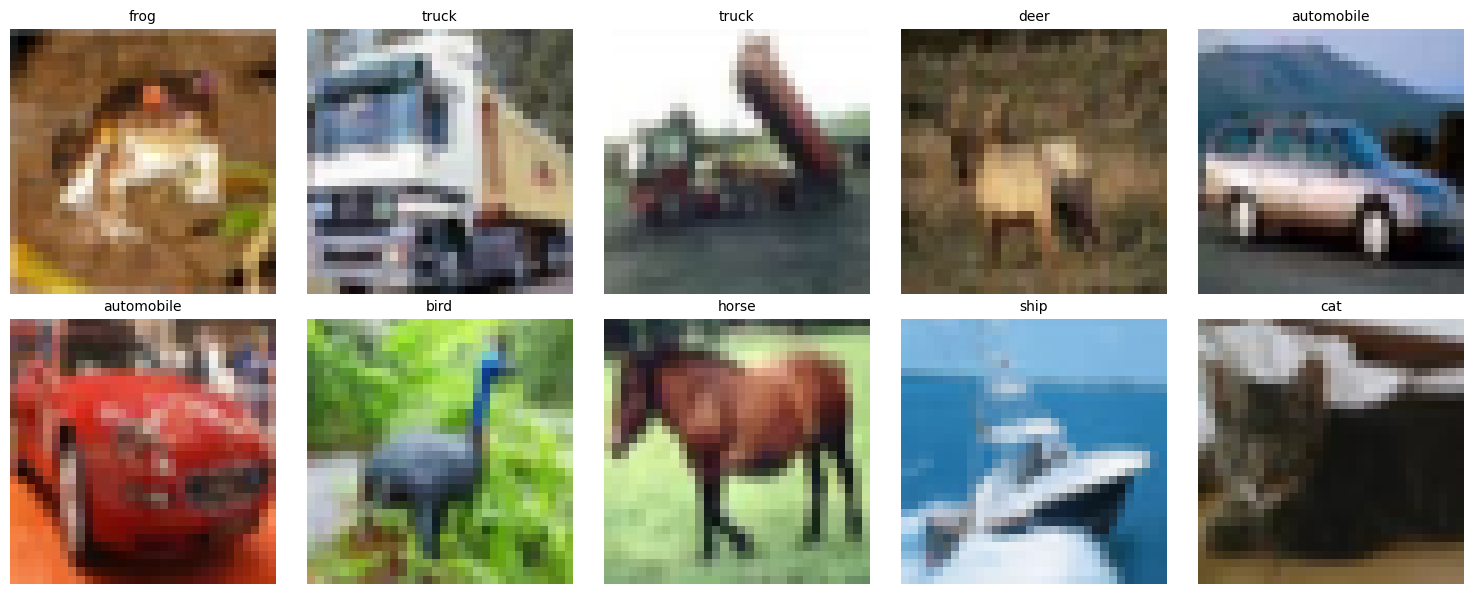

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_labels = train_labels.flatten()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 6)) 

# Displaying 10 training images in a 2x5 grid.
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(labels[train_labels[i]], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

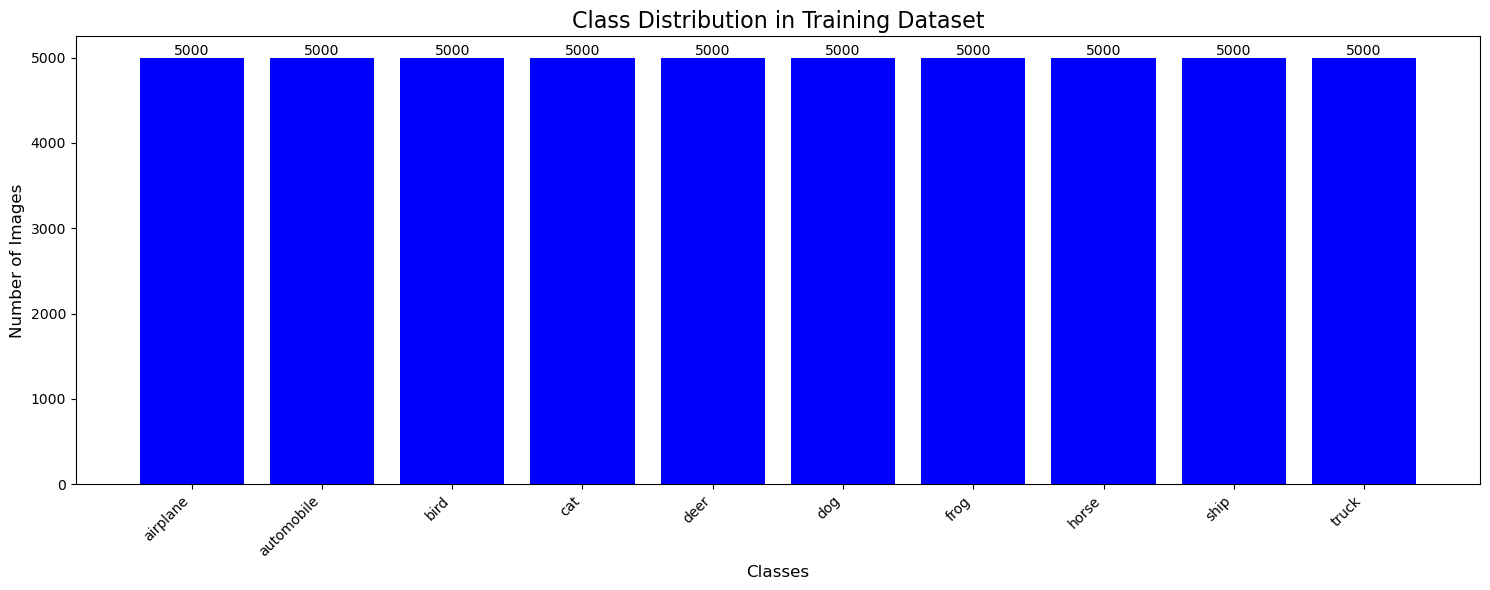


Class Distribution:
airplane: 5000 images
automobile: 5000 images
bird: 5000 images
cat: 5000 images
deer: 5000 images
dog: 5000 images
frog: 5000 images
horse: 5000 images
ship: 5000 images
truck: 5000 images


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

train_labels_flat = train_labels.flatten()

unique_classes, class_counts = np.unique(train_labels_flat, return_counts=True)

# Creation of a bar plot.
plt.figure(figsize=(15, 6))
plt.bar(labels, class_counts, color='blue')

# Customizing the plot.
plt.title('Class Distribution in Training Dataset', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Here printing out the detailed distribution for reference.
print("\nClass Distribution:")
for label, count in zip(labels, class_counts):
    print(f"{label}: {count} images")

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization, 
    Flatten, Dense, Dropout, GlobalAveragePooling2D
)

def advanced_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    i = Input(shape=input_shape)
    
    # First Block
    x = Conv2D(64, (3, 3), activation='relu', padding='same', 
               kernel_regularizer=l2(0.0001))(i)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', 
               kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    
    # Second Block
    x = Conv2D(128, (3, 3), activation='relu', padding='same', 
               kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', 
               kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    
    # Third Block
    x = Conv2D(256, (3, 3), activation='relu', padding='same', 
               kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', 
               kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)
    
    # Global Average Pooling instead of Flatten
    x = GlobalAveragePooling2D()(x)
    
    # Dense layers
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(i, x)
    
    return model

K = len(labels)
S = len(np.unique(train_images))
print("Number of classes: ", S)
model = advanced_cnn_model(input_shape=train_images[0].shape, num_classes=K)
model.summary()

Number of classes:  256


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,417,546 (5.41 MB)

 Trainable params: 1,414,218 (5.39 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau, 
    EarlyStopping, 
    ModelCheckpoint
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

def advanced_data_augmentation():
    return ImageDataGenerator(
        rotation_range=15,      
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True,   
        vertical_flip=False,    
        zoom_range=0.1,         
        shear_range=0.1,        
        fill_mode='constant',   
        cval=0,                 
    )

def compile_and_train_model(
    model, 
    train_images, 
    train_labels, 
    test_images, 
    test_labels, 
    epochs=50, 
    batch_size=64
):
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    lr_reducer = ReduceLROnPlateau(
        monitor='val_accuracy', 
        factor=0.5, 
        patience=5, 
        min_lr=0.00001,
        verbose=1
    )
    early_stopping = EarlyStopping(
        monitor='val_accuracy', 
        patience=10, 
        restore_best_weights=True,
        verbose=1
    )
    model_checkpoint = ModelCheckpoint(
        'best_model.keras', 
        monitor='val_accuracy', 
        save_best_only=True,
        verbose=1
    )
    data_generator = advanced_data_augmentation()
    train_generator = data_generator.flow(
        train_images, 
        train_labels, 
        batch_size=batch_size
    )
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_images) // batch_size,
        epochs=epochs,
        validation_data=(test_images, test_labels),
        callbacks=[lr_reducer, early_stopping, model_checkpoint],
        verbose=1
    )
    
    return history

# Train the model over here.  
history = compile_and_train_model(
    model, 
    train_images, 
    train_labels, 
    test_images, 
    test_labels
)

# Now ready to evaluate the model over here.
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Final Test Loss: {test_loss:.4f}, Final Test Accuracy: {test_accuracy * 100:.2f}%")

C:\Users\jena0\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.2852 - loss: 2.3359
Epoch 1: val_accuracy improved from -inf to 0.46110, saving model to best_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 524s 651ms/step - accuracy: 0.2853 - loss: 2.3355 - val_accuracy: 0.4611 - val_loss: 1.8084 - learning_rate: 0.0010
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 7:58 613ms/step - accuracy: 0.5781 - loss: 1.4027

C:\Users\jena0\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.46110 to 0.46980, saving model to best_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.5781 - loss: 1.4027 - val_accuracy: 0.4698 - val_loss: 1.7651 - learning_rate: 0.0010
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.5349 - loss: 1.4540
Epoch 3: val_accuracy improved from 0.46980 to 0.55970, saving model to best_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 517s 662ms/step - accuracy: 0.5349 - loss: 1.4539 - val_accuracy: 0.5597 - val_loss: 1.5705 - learning_rate: 0.0010
Epoch 4/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8:11 630ms/step - accuracy: 0.6094 - loss: 1.2620
Epoch 4: val_accuracy did not improve from 0.55970
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6094 - loss: 1.2620 - val_accuracy: 0.5556 - val_loss: 1.5794 - learning_rate: 0.0010
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.6301 - loss: 1.2160
Epoch 5: val_accuracy improved from 0.55970 to 0.66390, saving model to b

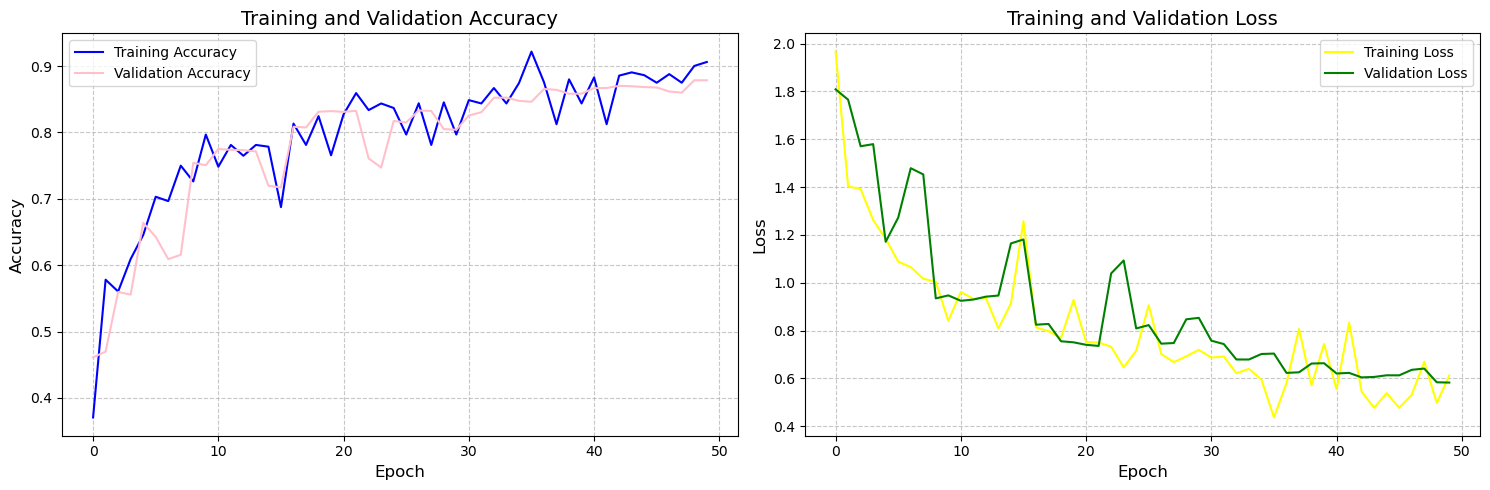

Model Training Performance Summary:

--- Accuracies ---
Final Training Accuracy:   0.9062 (90.62%)
Final Validation Accuracy: 0.8787 (87.87%)
Best Training Accuracy:    0.9219 (92.19%)
Best Validation Accuracy:  0.8787 (87.87%)

--- Losses ---
Final Training Loss:   0.6124
Final Validation Loss: 0.5828
Lowest Training Loss:  0.4371
Lowest Validation Loss:0.5828

--- Performance Improvement ---
Training Accuracy Improvement:     0.5357
Validation Accuracy Improvement:   0.4176


In [23]:
#1. Visualization of training history

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='pink')
plt.title('Training and Validation Accuracy', fontsize=14) 
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Model Training Performance Summary:")

# Accuracies
print("\n--- Accuracies ---")
print(f"Final Training Accuracy:   {history.history['accuracy'][-1]:.4f} ({history.history['accuracy'][-1]*100:.2f}%)")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f} ({history.history['val_accuracy'][-1]*100:.2f}%)")
print(f"Best Training Accuracy:    {max(history.history['accuracy']):.4f} ({max(history.history['accuracy'])*100:.2f}%)")
print(f"Best Validation Accuracy:  {max(history.history['val_accuracy']):.4f} ({max(history.history['val_accuracy'])*100:.2f}%)")

# Losses
print("\n--- Losses ---")
print(f"Final Training Loss:   {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Lowest Training Loss:  {min(history.history['loss']):.4f}")
print(f"Lowest Validation Loss:{min(history.history['val_loss']):.4f}")

# Performance Improvement
print("\n--- Performance Improvement ---")
print(f"Training Accuracy Improvement:     {history.history['accuracy'][-1] - history.history['accuracy'][0]:.4f}")
print(f"Validation Accuracy Improvement:   {history.history['val_accuracy'][-1] - history.history['val_accuracy'][0]:.4f}")    

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


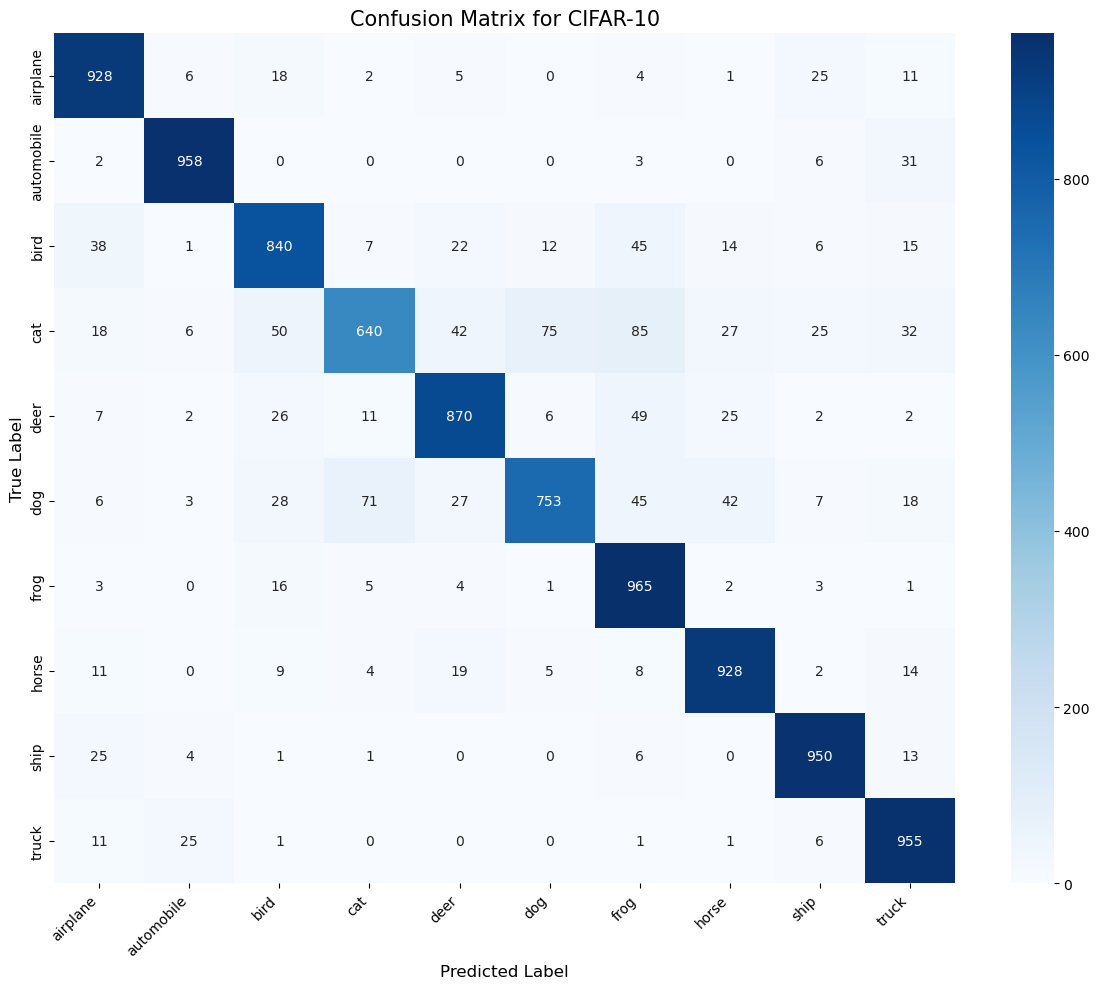


Confusion Matrix Insights:
airplane:
  Accuracy:  92.80%
  Precision: 88.47%
  Recall:    92.80%
automobile:
  Accuracy:  95.80%
  Precision: 95.32%
  Recall:    95.80%
bird:
  Accuracy:  84.00%
  Precision: 84.93%
  Recall:    84.00%
cat:
  Accuracy:  64.00%
  Precision: 86.37%
  Recall:    64.00%
deer:
  Accuracy:  87.00%
  Precision: 87.97%
  Recall:    87.00%
dog:
  Accuracy:  75.30%
  Precision: 88.38%
  Recall:    75.30%
frog:
  Accuracy:  96.50%
  Precision: 79.69%
  Recall:    96.50%
horse:
  Accuracy:  92.80%
  Precision: 89.23%
  Recall:    92.80%
ship:
  Accuracy:  95.00%
  Precision: 92.05%
  Recall:    95.00%
truck:
  Accuracy:  95.50%
  Precision: 87.45%
  Recall:    95.50%

Overall Accuracy: 87.87%


In [25]:
#2. Confusion Matrix
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    
    # Creating heatmap.
    sns.heatmap(cm, 
                annot=True, 
                fmt='d',     
                cmap='Blues', 
                xticklabels=labels, 
                yticklabels=labels)
    
    plt.title('Confusion Matrix for CIFAR-10', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\nConfusion Matrix Insights:")
    class_accuracies = cm.diagonal() / cm.sum(axis=1)
    
    for i, (label, accuracy) in enumerate(zip(labels, class_accuracies)):

        precision = cm[i, i] / cm[:, i].sum() if cm[:, i].sum() > 0 else 0
        recall = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0

        print(f"{label}:")
        print(f"  Accuracy:  {accuracy*100:.2f}%")
        print(f"  Precision: {precision*100:.2f}%")
        print(f"  Recall:    {recall*100:.2f}%")
    
    
    # Total overall accuracy
    total_accuracy = cm.diagonal().sum() / cm.sum()
    print(f"\nOverall Accuracy: {total_accuracy*100:.2f}%")

def apply_confusion_matrix(model, test_images, test_labels, labels):
    
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = test_labels.flatten()
    plot_confusion_matrix(test_labels, y_pred_classes, labels)

apply_confusion_matrix(model, test_images, test_labels, labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step

Detailed Classification Report:

              precision    recall  f1-score   support

    airplane       0.88      0.93      0.91      1000
  automobile       0.95      0.96      0.96      1000
        bird       0.85      0.84      0.84      1000
         cat       0.86      0.64      0.74      1000
        deer       0.88      0.87      0.87      1000
         dog       0.88      0.75      0.81      1000
        frog       0.80      0.96      0.87      1000
       horse       0.89      0.93      0.91      1000
        ship       0.92      0.95      0.94      1000
       truck       0.87      0.95      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



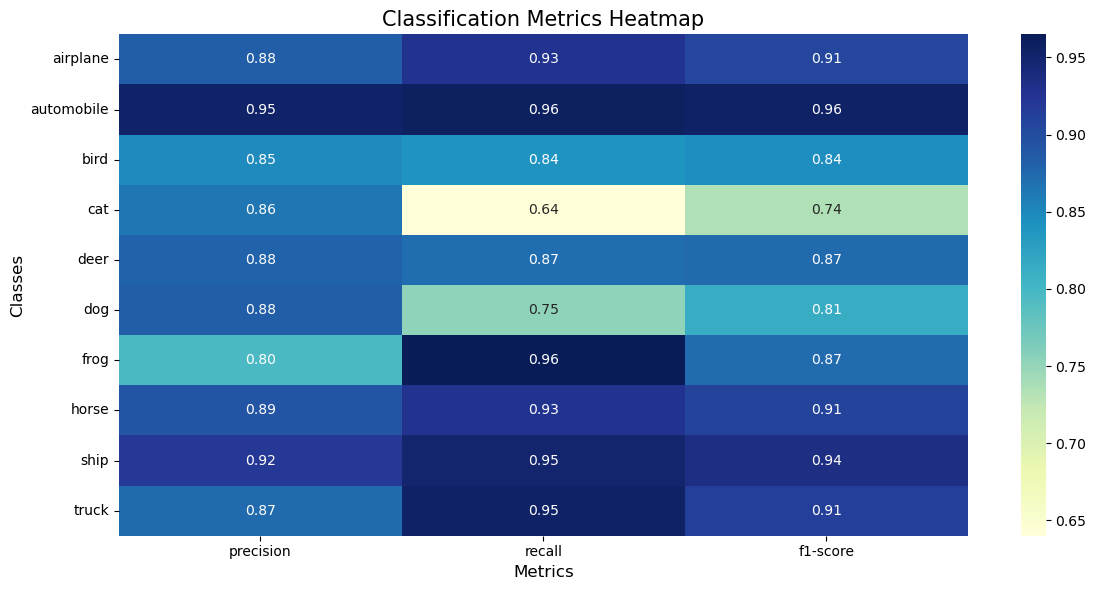


Advanced Classification Insights:

Overall Performance:
Macro Average Precision: 0.8799
Macro Average Recall:    0.8787
Macro Average F1-Score:  0.8760

Weighted Average Performance:
Weighted Precision: 0.8799
Weighted Recall:    0.8787
Weighted F1-Score:  0.8760

Best Performing Class: automobile (F1-Score: 0.9556)
Worst Performing Class: cat (F1-Score: 0.7352)


In [27]:
#3. Classification Report
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

def generate_classification_report(model, test_images, test_labels):
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = test_labels.flatten()
    report = classification_report(
        y_true_classes, 
        y_pred_classes, 
        target_names=labels, 
        output_dict=True
    )
    print("\nDetailed Classification Report:\n")
    print(classification_report(
        y_true_classes, 
        y_pred_classes, 
        target_names=labels
    ))
    def plot_classification_metrics(report):
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        metrics = ['precision', 'recall', 'f1-score']
        classes = labels
        plt.figure(figsize=(12, 6))
        data = [[report[cls][metric] for metric in metrics] for cls in classes]
        sns.heatmap(
            data, 
            annot=True, 
            fmt='.2f', 
            cmap='YlGnBu',
            xticklabels=metrics,
            yticklabels=classes
        )
        
        plt.title('Classification Metrics Heatmap', fontsize=15)
        plt.xlabel('Metrics', fontsize=12)
        plt.ylabel('Classes', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    # Visualization of classification metrics
    plot_classification_metrics(report)
    
    # Insights
    def advanced_report_analysis(report):
        print("\nAdvanced Classification Insights:")
        
        # Overall performance
        macro_avg = report['macro avg']
        weighted_avg = report['weighted avg']
        
        print("\nOverall Performance:")
        print(f"Macro Average Precision: {macro_avg['precision']:.4f}")
        print(f"Macro Average Recall:    {macro_avg['recall']:.4f}")
        print(f"Macro Average F1-Score:  {macro_avg['f1-score']:.4f}")
        
        print("\nWeighted Average Performance:")
        print(f"Weighted Precision: {weighted_avg['precision']:.4f}")
        print(f"Weighted Recall:    {weighted_avg['recall']:.4f}")
        print(f"Weighted F1-Score:  {weighted_avg['f1-score']:.4f}")
        
        # Identification of best and worst performing classes
        class_f1_scores = {cls: report[cls]['f1-score'] for cls in labels}
        best_class = max(class_f1_scores, key=class_f1_scores.get)
        worst_class = min(class_f1_scores, key=class_f1_scores.get)
        
        print(f"\nBest Performing Class: {best_class} (F1-Score: {class_f1_scores[best_class]:.4f})")
        print(f"Worst Performing Class: {worst_class} (F1-Score: {class_f1_scores[worst_class]:.4f})")
    
    advanced_report_analysis(report)
    
    return report

classification_report_result = generate_classification_report(model, test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


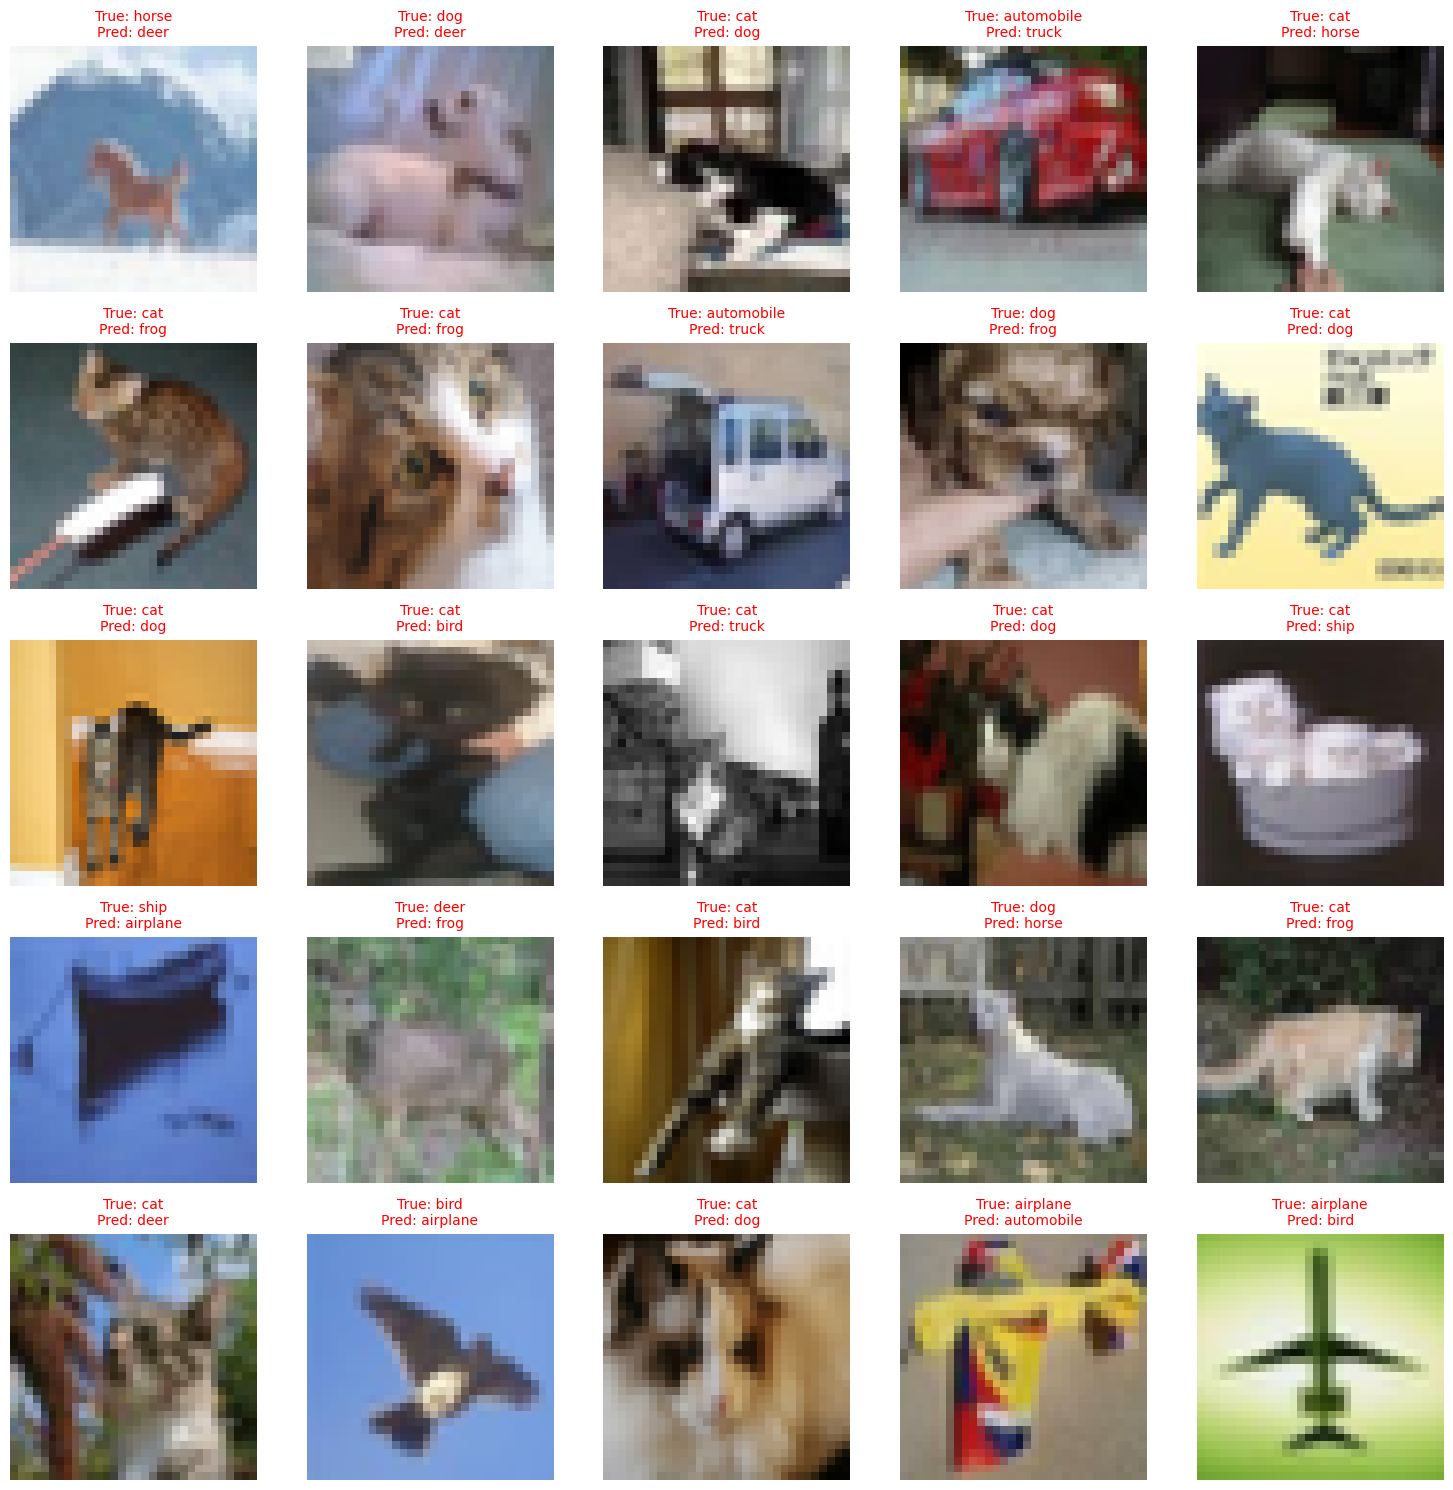


Misclassification Statistics:
Total test samples: 10000
Total misclassified: 1213
Error rate: 12.13%

Per-class misclassification rates:
airplane: 7.20% (72/1000)
automobile: 4.20% (42/1000)
bird: 16.00% (160/1000)
cat: 36.00% (360/1000)
deer: 13.00% (130/1000)
dog: 24.70% (247/1000)
frog: 3.50% (35/1000)
horse: 7.20% (72/1000)
ship: 5.00% (50/1000)
truck: 4.50% (45/1000)


In [29]:
#4. Misclassification Statistics
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def display_misclassified_images(model, test_images, test_labels, labels, num_images=25):
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_labels.flatten()
    misclassified_indices = np.where(predicted_classes != true_classes)[0]
    
    if len(misclassified_indices) > num_images:
        selected_indices = np.random.choice(misclassified_indices, num_images, replace=False)
    else:
        selected_indices = misclassified_indices
        num_images = len(misclassified_indices)
        
    grid_size = int(np.ceil(np.sqrt(num_images)))
    
    plt.figure(figsize=(15, 15))
    
    for idx, i in enumerate(selected_indices):
        plt.subplot(grid_size, grid_size, idx + 1)
        plt.imshow(test_images[i])
        plt.axis('off')
        true_label = labels[true_classes[i]]
        pred_label = labels[predicted_classes[i]]
        plt.title(f'True: {true_label}\nPred: {pred_label}', 
                 color='green' if true_label == pred_label else 'red',
                 fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    total_misclassified = len(misclassified_indices)
    total_samples = len(test_labels)
    print(f"\nMisclassification Statistics:")
    print(f"Total test samples: {total_samples}")
    print(f"Total misclassified: {total_misclassified}")
    print(f"Error rate: {(total_misclassified/total_samples)*100:.2f}%")
    
    # Calculating per-class misclassification
    print("\nPer-class misclassification rates:")
    for i, label in enumerate(labels):
        class_samples = np.sum(true_classes == i)
        class_misclassified = np.sum((true_classes == i) & (predicted_classes != i))
        error_rate = (class_misclassified/class_samples)*100 if class_samples > 0 else 0
        print(f"{label}: {error_rate:.2f}% ({class_misclassified}/{class_samples})")
 
display_misclassified_images(model, test_images, test_labels, labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step
=== Model Performance Analysis ===

Confidence Metrics:
Average confidence (correct): 0.946
Average confidence (incorrect): 0.696
Minimum confidence (correct): 0.243
Maximum confidence (incorrect): 1.000

Top 5 Confused Class Pairs:
cat → frog: 85 instances
cat → dog: 75 instances
dog → cat: 71 instances
cat → bird: 50 instances
deer → frog: 49 instances

High Confidence Mistakes (>90% confidence): 249


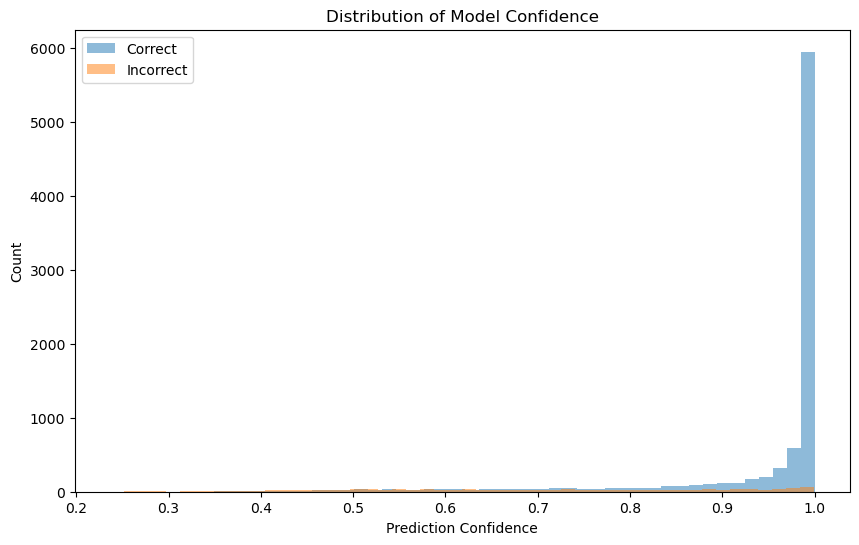

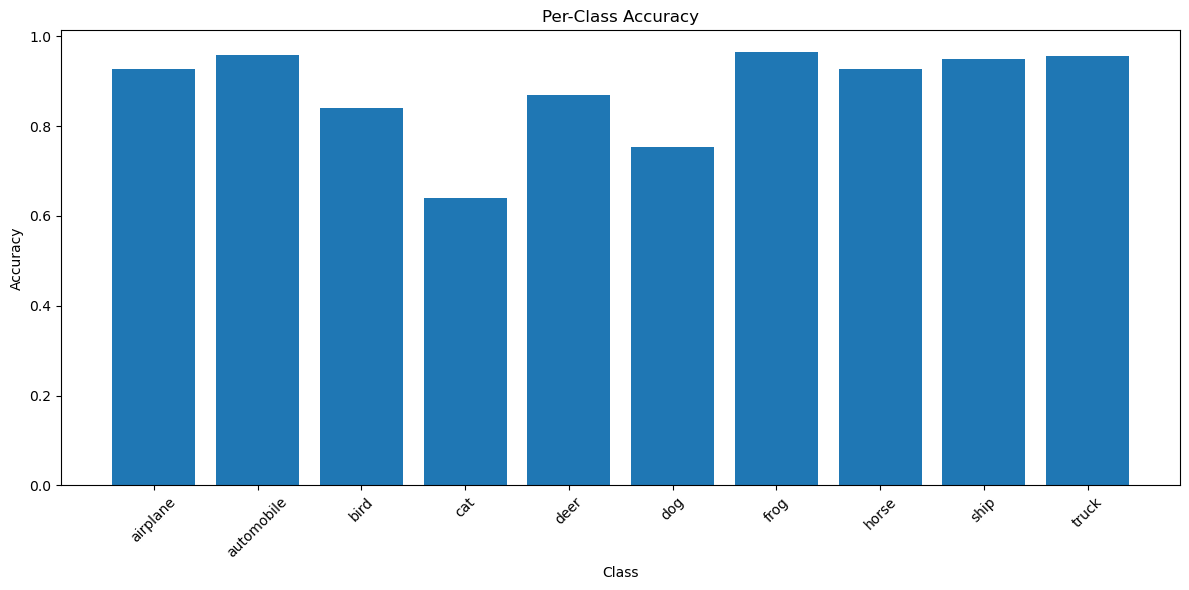


Examples of high confidence mistakes:


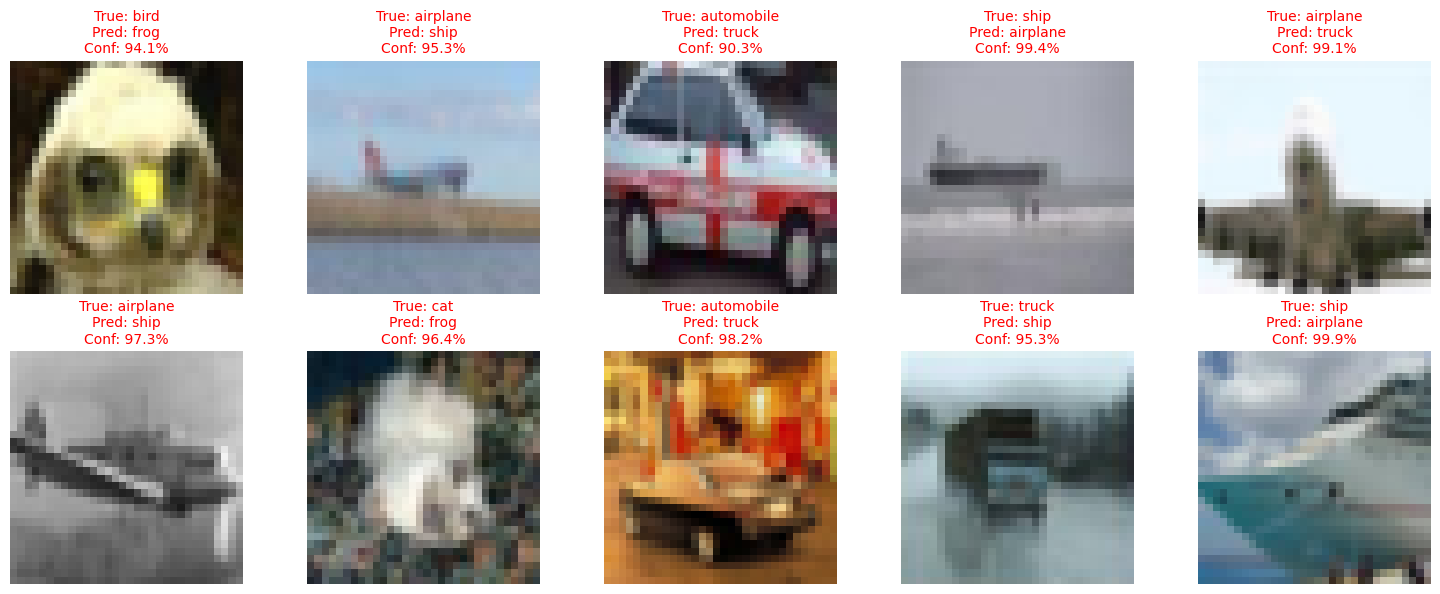

In [33]:
#5. Confidence Metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

class ModelAnalysisHelper:
    def __init__(self, model, test_images, test_labels, class_names):
        self.model = model
        self.test_images = test_images
        self.test_labels = test_labels.flatten()
        self.class_names = class_names
        self.predictions = model.predict(test_images)
        self.pred_classes = np.argmax(self.predictions, axis=1)
        
    def get_misclassified_indices(self):
        return np.where(self.pred_classes != self.test_labels)[0]
    
    def get_confidence_metrics(self):
        confidences = np.max(self.predictions, axis=1)
        correct_mask = self.pred_classes == self.test_labels
        
        metrics = {
            'avg_confidence_correct': np.mean(confidences[correct_mask]),
            'avg_confidence_incorrect': np.mean(confidences[~correct_mask]),
            'min_confidence_correct': np.min(confidences[correct_mask]),
            'max_confidence_incorrect': np.max(confidences[~correct_mask])
        }
        return metrics
    
    def find_high_confidence_mistakes(self, threshold=0.9):
        confidences = np.max(self.predictions, axis=1)
        mistakes = self.pred_classes != self.test_labels
        high_conf_mistakes = (confidences > threshold) & mistakes
        return np.where(high_conf_mistakes)[0]
    
    def get_class_confusion_pairs(self):
        cm = confusion_matrix(self.test_labels, self.pred_classes)
        confused_pairs = []
        
        for i in range(len(self.class_names)):
            for j in range(len(self.class_names)):
                if i != j:
                    confused_pairs.append({
                        'true': self.class_names[i],
                        'predicted': self.class_names[j],
                        'count': cm[i, j]
                    })
        
        return sorted(confused_pairs, key=lambda x: x['count'], reverse=True)
    
    def plot_confidence_distribution(self):
        confidences = np.max(self.predictions, axis=1)
        correct_mask = self.pred_classes == self.test_labels
        
        plt.figure(figsize=(10, 6))
        plt.hist(confidences[correct_mask], alpha=0.5, label='Correct', bins=50)
        plt.hist(confidences[~correct_mask], alpha=0.5, label='Incorrect', bins=50)
        plt.xlabel('Prediction Confidence')
        plt.ylabel('Count')
        plt.title('Distribution of Model Confidence')
        plt.legend()
        plt.show()
    
    def plot_class_accuracies(self):
        accuracies = []
        for i in range(len(self.class_names)):
            mask = self.test_labels == i
            class_acc = np.mean(self.pred_classes[mask] == self.test_labels[mask])
            accuracies.append(class_acc)
        
        plt.figure(figsize=(12, 6))
        plt.bar(self.class_names, accuracies)
        plt.xticks(rotation=45)
        plt.xlabel('Class')
        plt.ylabel('Accuracy')
        plt.title('Per-Class Accuracy')
        plt.tight_layout()
        plt.show()
    
    def show_example_predictions(self, indices, cols=5):
        rows = len(indices) // cols + (1 if len(indices) % cols != 0 else 0)
        plt.figure(figsize=(3*cols, 3*rows))
        
        for idx, i in enumerate(indices):
            plt.subplot(rows, cols, idx + 1)
            plt.imshow(self.test_images[i])
            plt.axis('off')
            
            true_label = self.class_names[self.test_labels[i]]
            pred_label = self.class_names[self.pred_classes[i]]
            confidence = np.max(self.predictions[i]) * 100
            
            color = 'green' if true_label == pred_label else 'red'
            plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                     color=color, fontsize=10)
        
        plt.tight_layout()
        plt.show()
    
    def analyze_model_performance(self):
        conf_metrics = self.get_confidence_metrics()
        confused_pairs = self.get_class_confusion_pairs()[:5]  # Top 5 confused pairs
        high_conf_mistakes = self.find_high_confidence_mistakes()
        
        print("=== Model Performance Analysis ===")
        print("\nConfidence Metrics:")
        print(f"Average confidence (correct): {conf_metrics['avg_confidence_correct']:.3f}")
        print(f"Average confidence (incorrect): {conf_metrics['avg_confidence_incorrect']:.3f}")
        print(f"Minimum confidence (correct): {conf_metrics['min_confidence_correct']:.3f}")
        print(f"Maximum confidence (incorrect): {conf_metrics['max_confidence_incorrect']:.3f}")
        
        print("\nTop 5 Confused Class Pairs:")
        for pair in confused_pairs:
            print(f"{pair['true']} → {pair['predicted']}: {pair['count']} instances")
        
        print(f"\nHigh Confidence Mistakes (>90% confidence): {len(high_conf_mistakes)}")
        
        self.plot_confidence_distribution()
        self.plot_class_accuracies()
        
        if len(high_conf_mistakes) > 0:
            print("\nExamples of high confidence mistakes:")
            self.show_example_predictions(high_conf_mistakes[:10])

analyzer = ModelAnalysisHelper(model, test_images, test_labels, labels)

analyzer.analyze_model_performance()

# Get specific insights
misclassified = analyzer.get_misclassified_indices()
conf_metrics = analyzer.get_confidence_metrics()
confused_pairs = analyzer.get_class_confusion_pairs()
high_conf_mistakes = analyzer.find_high_confidence_mistakes()

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


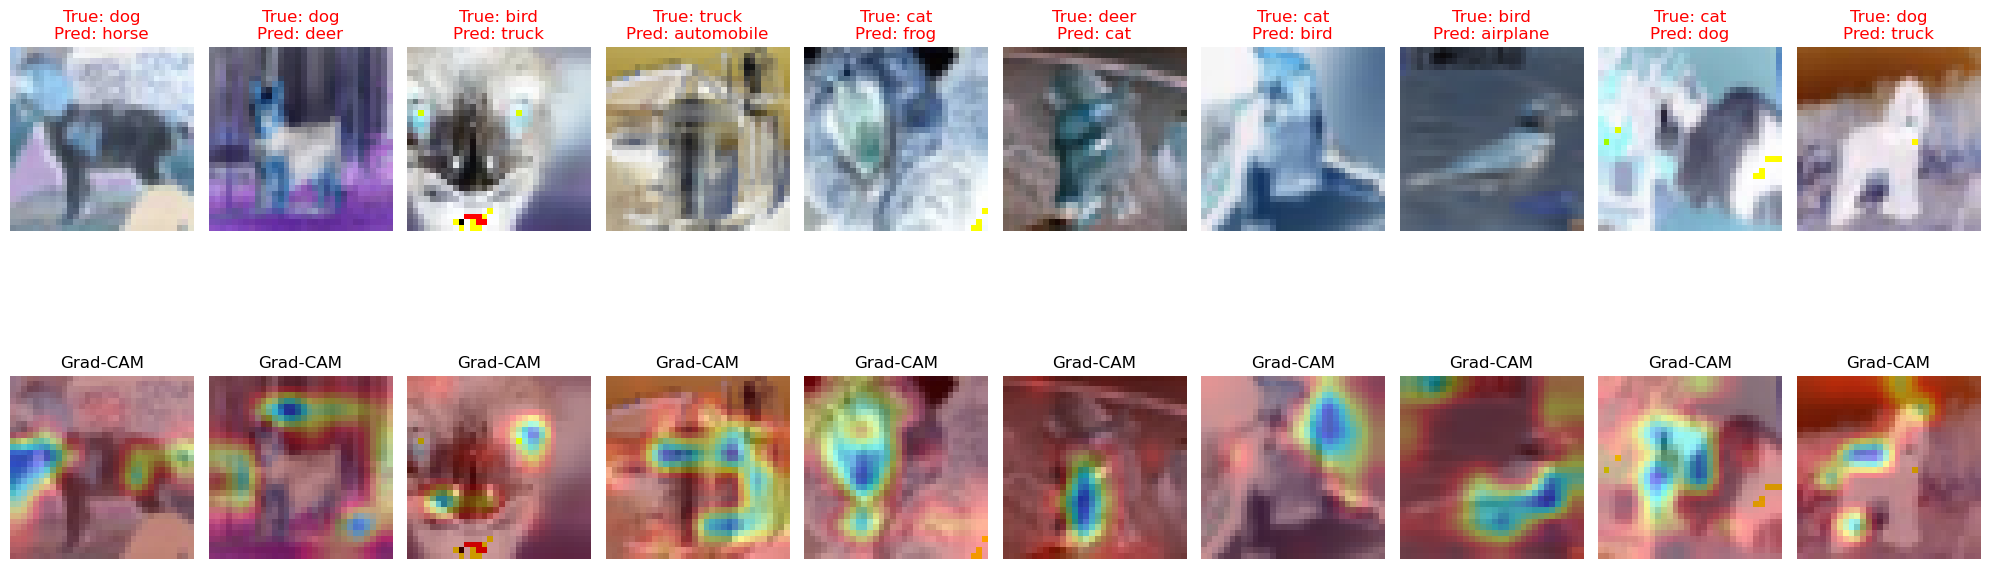

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def get_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer
    raise ValueError("No convolutional layer found in the model")

def create_gradcam_visualization(model, image, pred_index=None):
    last_conv_layer = get_last_conv_layer(model)
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [last_conv_layer.output, model.output]
    )
    
    image_array = np.array([image])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    heatmap = tf.matmul(conv_outputs[0], pooled_grads[..., tf.newaxis])
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    heatmap = cv2.resize(heatmap.numpy(), (image.shape[1], image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    
    orig_img = np.uint8(image * 255)
    
    superimposed = cv2.addWeighted(orig_img, 0.6, heatmap_colored, 0.4, 0)
    
    return orig_img, heatmap_colored, superimposed

def display_gradcam_results(model, images, true_labels, pred_labels, class_names, num_images=10):
    num_display = min(num_images, len(images))
    fig, axes = plt.subplots(2, num_display, figsize=(20, 8))
    
    for i in range(num_display):
        true_label = class_names[true_labels[i]]
        pred_label = class_names[pred_labels[i]]
        
        orig_img, _, superimposed = create_gradcam_visualization(model, images[i])
        
        # Original image
        axes[0, i].imshow(orig_img)
        axes[0, i].set_title(f'True: {true_label}\nPred: {pred_label}',
                           color='green' if true_label == pred_label else 'red')
        axes[0, i].axis('off')
        
        # Grad-CAM visualization
        axes[1, i].imshow(superimposed)
        axes[1, i].set_title('Grad-CAM')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

def get_misclassified_samples(model, test_images, test_labels, num_samples=10):
    predictions = model.predict(test_images)
    pred_labels = np.argmax(predictions, axis=1)
    misclassified = np.where(pred_labels != test_labels.flatten())[0]
    selected_indices = misclassified[:num_samples]
    
    return (test_images[selected_indices], 
            test_labels.flatten()[selected_indices], 
            pred_labels[selected_indices])
# Displaying Results    
selected_images, selected_true_labels, selected_pred_labels = get_misclassified_samples(model, test_images, test_labels)
display_gradcam_results(model, selected_images, selected_true_labels, selected_pred_labels, labels) 

In [ ]:
model.save(My_model.h5)